# Level 1


In [1]:
import pandas as pd
df = pd.read_csv('cleaned_dataset.csv')
print(df.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

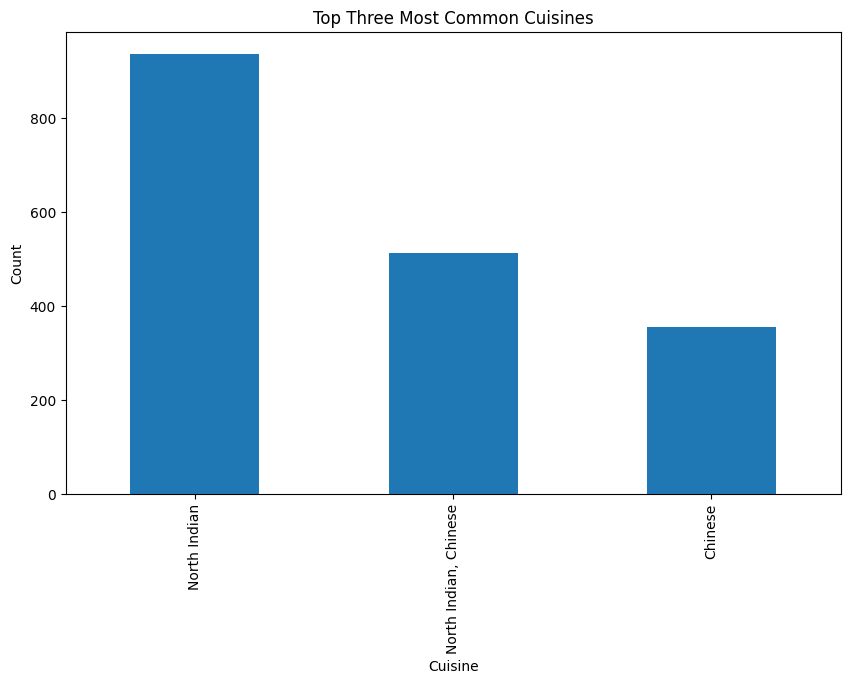

In [3]:
# Get the top three most common cuisines task 1 level 1
cuisine_counts = df['Cuisines'].value_counts()
top_three = cuisine_counts.head(3)
# Plot the top three cuisines
plt.figure(figsize=(10, 6))
top_three.plot(kind='bar')
plt.title('Top Three Most Common Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.show()

Cuisines
North Indian             9.809264
North Indian, Chinese    5.355271
Chinese                  3.709914
Name: count, dtype: float64


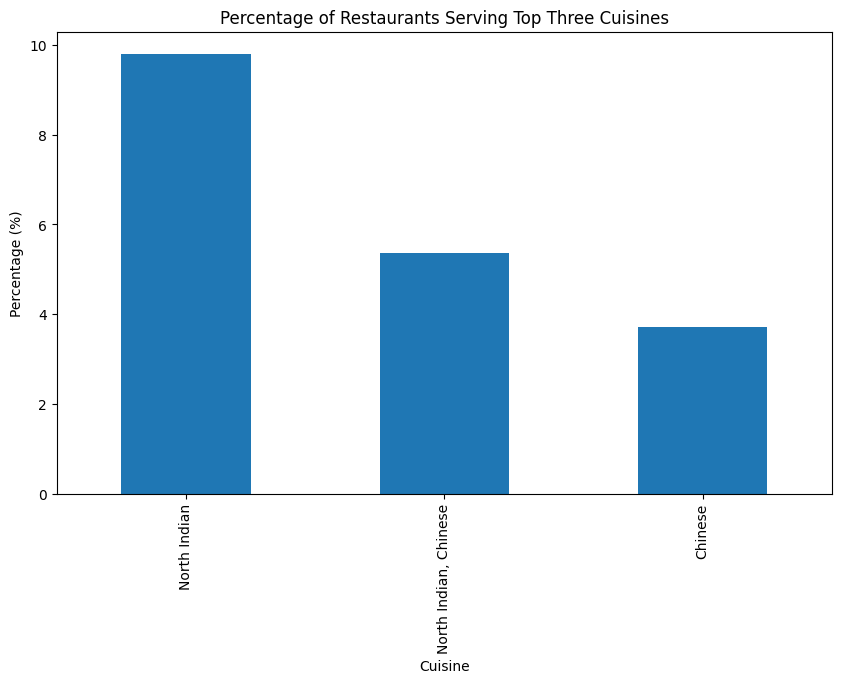

In [4]:
# Calculate percentage of restaurants serving each top cuisine 
total_restaurants = len(df)
percentages = (top_three / total_restaurants) * 100
print(percentages)
# Plot the percentages
plt.figure(figsize=(10, 6))
percentages.plot(kind='bar')
plt.title('Percentage of Restaurants Serving Top Three Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Percentage (%)')
plt.show()

The city with the highest number of restaurants is New Delhi with 5473 restaurants.


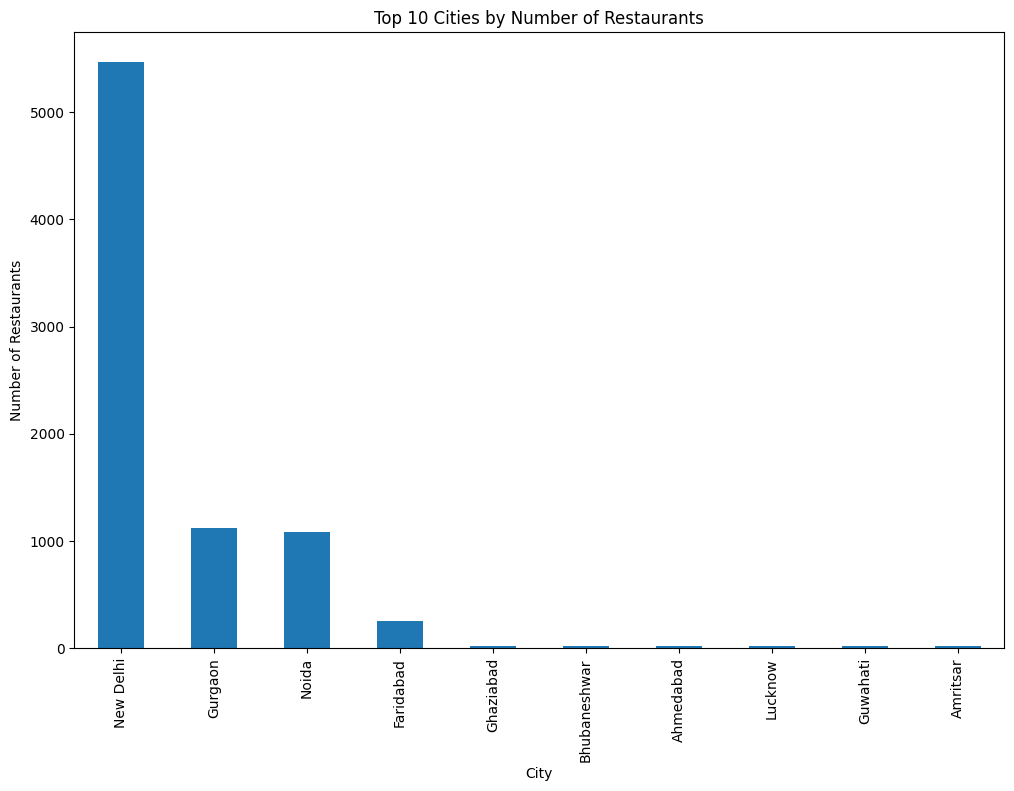

In [5]:
# Identify the city with the highest number of restaurants 
city_counts = df['City'].value_counts()
top_city = city_counts.idxmax()
top_count = city_counts.max()
print(f'The city with the highest number of restaurants is {top_city} with {top_count} restaurants.')
# Plot bar chart of top 10 cities
plt.figure(figsize=(12, 8))
city_counts.head(10).plot(kind='bar')
plt.title('Top 10 Cities by Number of Restaurants')
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.show()

   Price Range  Count  Percentage
0            1   4438   46.510166
1            2   3113   32.624188
2            3   1405   14.724376
3            4    586    6.141270


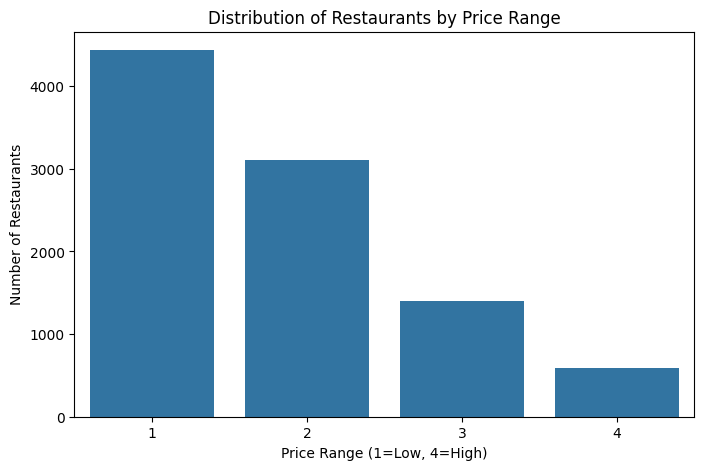

In [6]:
# Count of restaurants in each price range 
price_counts = df['Price range'].value_counts().sort_index()

# Percentage calculation
price_percent = (price_counts / df.shape[0]) * 100

price_data = pd.DataFrame({
    'Price Range': price_counts.index,
    'Count': price_counts.values,
    'Percentage': price_percent.values
})

print(price_data)

# Visualization: Histogram
plt.figure(figsize=(8,5))
sns.barplot(x=price_data['Price Range'], y=price_data['Count'])
plt.title("Distribution of Restaurants by Price Range")
plt.xlabel("Price Range (1=Low, 4=High)")
plt.ylabel("Number of Restaurants")
plt.show()


Percentage of Restaurants offering Online Delivery:
 Has Online delivery
No     74.313561
Yes    25.686439
Name: proportion, dtype: float64
  Has Online delivery  Aggregate rating
0                  No          2.463517
1                 Yes          3.248837


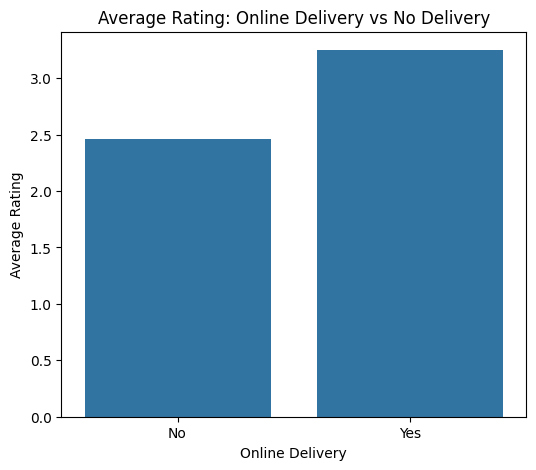

In [7]:
# Check column name (use df.columns to confirm) 
# Assuming column is 'Has Online delivery' with values 'Yes'/'No' 
# level 2 task 1

online_delivery = df['Has Online delivery'].value_counts(normalize=True) * 100
print("Percentage of Restaurants offering Online Delivery:\n", online_delivery)

# Average rating comparison
avg_rating_online = df.groupby('Has Online delivery')['Aggregate rating'].mean().reset_index()
print(avg_rating_online)

# Visualization: Stacked Bar Chart
plt.figure(figsize=(6,5))
sns.barplot(x='Has Online delivery', y='Aggregate rating', data=avg_rating_online)
plt.title("Average Rating: Online Delivery vs No Delivery")
plt.xlabel("Online Delivery")
plt.ylabel("Average Rating")
plt.show()


# Level 2


In [8]:
import pandas as pd
df = pd.read_csv('cleaned_dataset.csv')
print(df.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

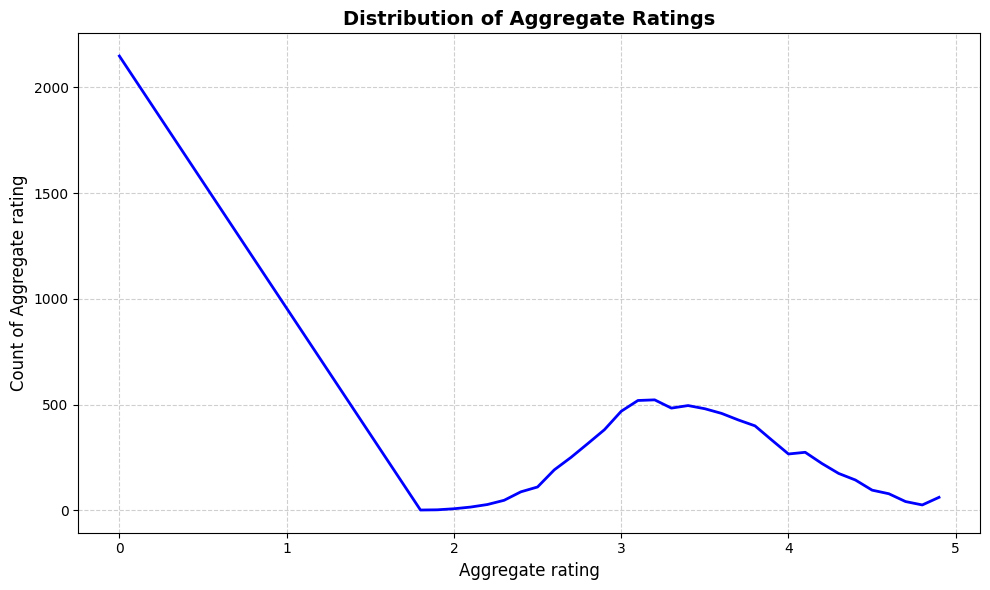

In [10]:
# Assuming the column is named 'Aggregate rating'
rating_counts = df['Aggregate rating'].value_counts().sort_index()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(rating_counts.index, rating_counts.values, color='blue', linewidth=2)

# Add labels and title
plt.title('Distribution of Aggregate Ratings', fontsize=14, fontweight='bold')
plt.xlabel('Aggregate rating', fontsize=12)
plt.ylabel('Count of Aggregate rating', fontsize=12)

# Add grid and style
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()

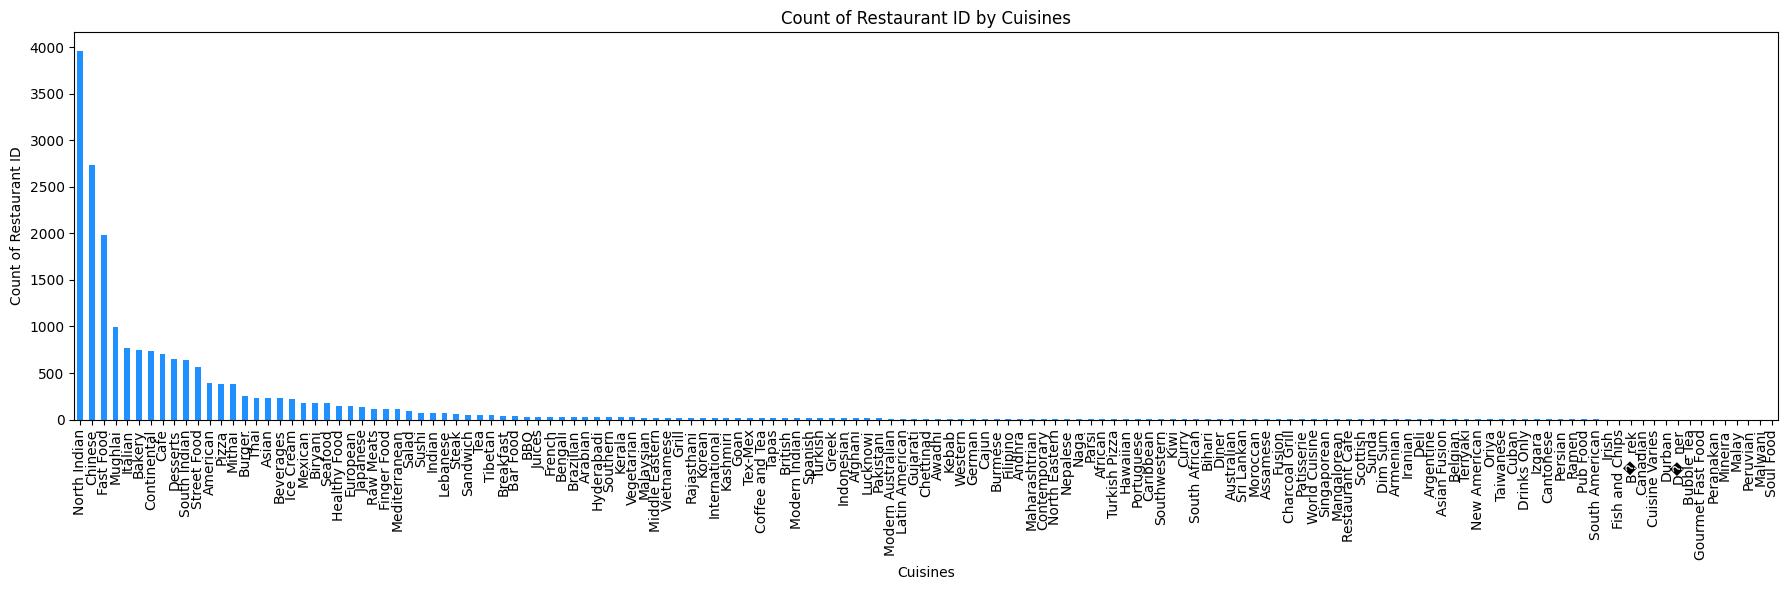

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('cleaned_dataset.csv')

# Create df_exploded by splitting and exploding the 'Cuisines' column
df_exploded = df.assign(Cuisines=df['Cuisines'].str.split(', ')).explode('Cuisines')

# Group by cuisine and count unique restaurant IDs
cuisine_counts = df_exploded.groupby('Cuisines')['Restaurant ID'].nunique().sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(18, 6))
cuisine_counts.plot(kind='bar', color='dodgerblue')
plt.xlabel('Cuisines')
plt.ylabel('Count of Restaurant ID')
plt.title('Count of Restaurant ID by Cuisines')
plt.tight_layout()
plt.show()


    Restaurant Name  Aggregate rating  Outlet Count
0   Barbeque Nation          4.353846            26
1    Baskin Robbins          1.860714            28
2   Cafe Coffee Day          2.419277            83
3    Domino's Pizza          2.740506            79
4             Giani          2.689655            29
5  Green Chick Chop          2.672549            51
6         Keventers          2.870588            34
7        McDonald's          3.339583            48
8         Pizza Hut          3.320000            30
9            Subway          2.907937            63


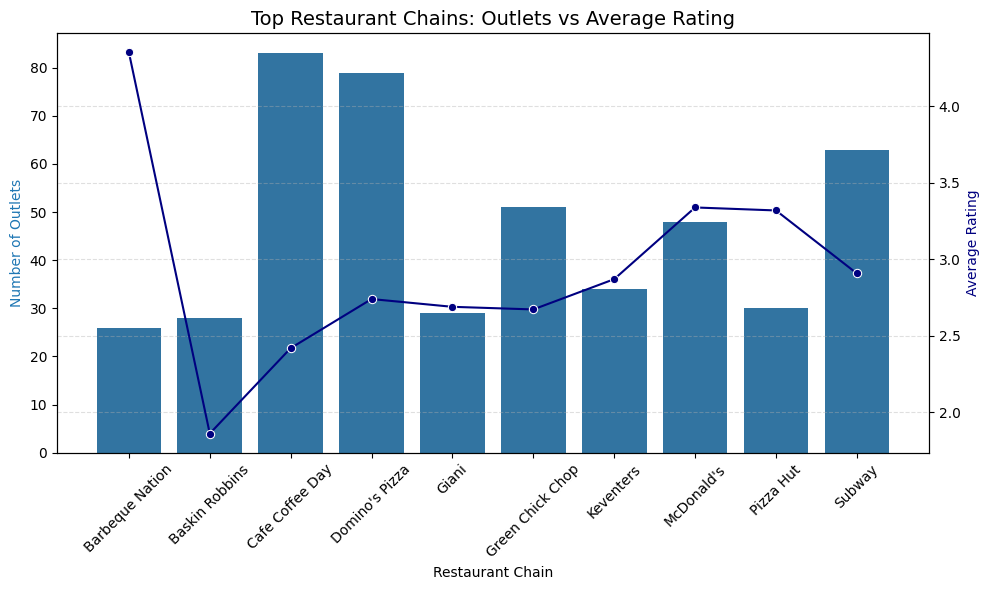

In [ ]:
# Identify chains with more than 1 outlet level 2 task 4
chain_counts = df['Restaurant Name'].value_counts()
top_chains = chain_counts[chain_counts > 1].head(10)

# Get average rating for these chains
chain_avg_rating = (
    df[df['Restaurant Name'].isin(top_chains.index)]
    .groupby('Restaurant Name')['Aggregate rating']
    .mean()
    .reset_index()
)

# Merge data
chain_df = chain_avg_rating.copy()
chain_df['Outlet Count'] = chain_df['Restaurant Name'].map(top_chains)

print(chain_df)

# Visualization: Dual-axis Bar + Line Chart (Blue)
fig, ax1 = plt.subplots(figsize=(10,6))

# Bars: Number of outlets
sns.barplot(x='Restaurant Name', y='Outlet Count', data=chain_df, color='#1f77b4', ax=ax1)
ax1.set_ylabel('Number of Outlets', color='#1f77b4')
ax1.set_xlabel('Restaurant Chain')
ax1.tick_params(axis='x', rotation=45)

# Line: Average rating
ax2 = ax1.twinx()
sns.lineplot(x='Restaurant Name', y='Aggregate rating', data=chain_df, color='navy', marker='o', ax=ax2)
ax2.set_ylabel('Average Rating', color='navy')

plt.title("Top Restaurant Chains: Outlets vs Average Rating", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


# Level 3


In [ ]:
import pandas as pd
df = pd.read_csv('cleaned_dataset.csv')
print(df.head())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter
import string
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Download necessary NLTK data
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\91994\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91994\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\91994\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91994\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to preprocess text
def preprocess_text(text):
    if pd.isna(text):
        return []
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return tokens

# Analyze reviews based on rating text
rating_sentiment = df.groupby('Rating text')['Aggregate rating'].mean().sort_values(ascending=False)
print("Average Rating by Rating Text:")
print(rating_sentiment)

# Classify positive and negative based on rating text
positive_reviews = df[df['Rating text'].isin(['Excellent', 'Very Good', 'Good'])]['Rating text']
negative_reviews = df[df['Rating text'].isin(['Poor', 'Average'])]['Rating text']

# Analyze positive reviews
positive_words = []
for review in positive_reviews.dropna():
    tokens = preprocess_text(review)
    positive_words.extend(tokens)

# Analyze negative reviews
negative_words = []
for review in negative_reviews.dropna():
    tokens = preprocess_text(review)
    negative_words.extend(tokens)

# Count most common
positive_counts = Counter(positive_words).most_common(10)
negative_counts = Counter(negative_words).most_common(10)

print("\nMost Common Positive Keywords:")
for word, count in positive_counts:
    print(f"{word}: {count}")

print("\nMost Common Negative Keywords:")
for word, count in negative_counts:
    print(f"{word}: {count}")



Average Rating by Rating Text:
Rating text
Excellent    4.659667
Very Good    4.167904
Good         3.683063
Average      3.051339
Poor         2.297849
Not rated    0.000000
Name: Aggregate rating, dtype: float64

Most Common Positive Keywords:
good: 3174
excellent: 300

Most Common Negative Keywords:
average: 3734
poor: 186


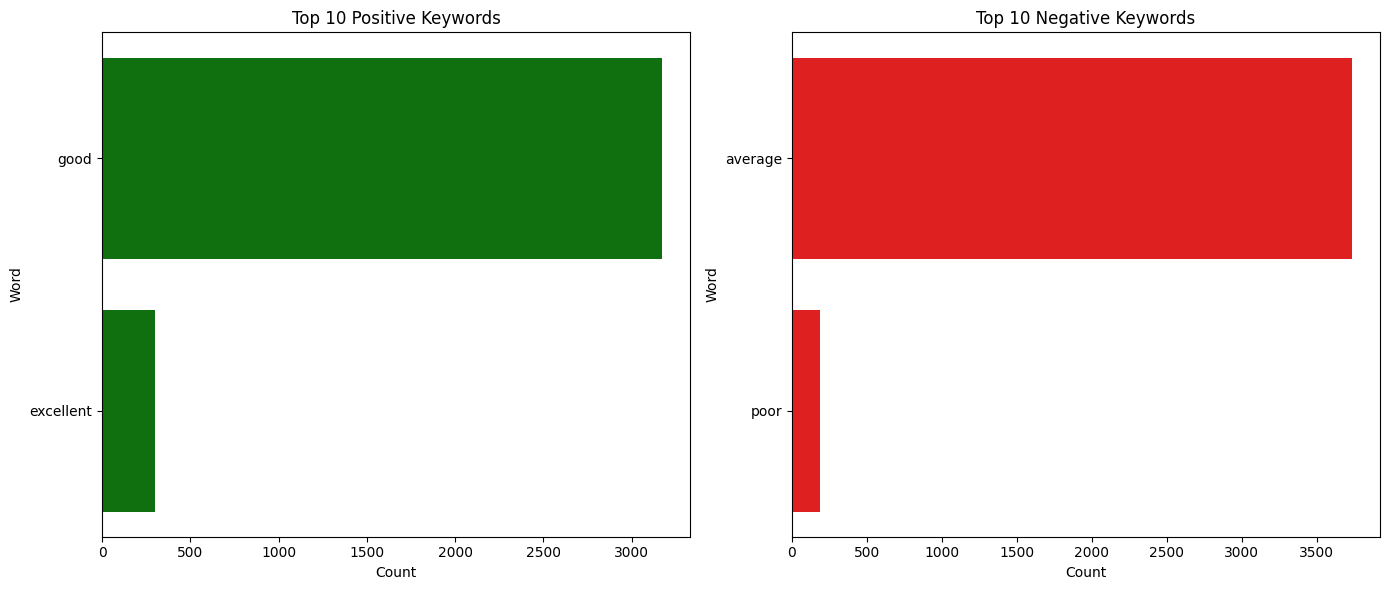

In [ ]:
# Visualization: Bar charts for positive and negative keywords
pos_df = pd.DataFrame(positive_counts, columns=['Word', 'Count'])
neg_df = pd.DataFrame(negative_counts, columns=['Word', 'Count'])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(x='Count', y='Word', data=pos_df, ax=axes[0], color='green')
axes[0].set_title('Top 10 Positive Keywords')
sns.barplot(x='Count', y='Word', data=neg_df, ax=axes[1], color='red')
axes[1].set_title('Top 10 Negative Keywords')
plt.tight_layout()
plt.show()


Average length of Rating text: 7.02 characters

Average length per Rating text category:
Rating text
Excellent    9.0
Not rated    9.0
Very Good    9.0
Average      7.0
Good         4.0
Poor         4.0
Name: Rating Length, dtype: float64

Correlation between Rating Length and Aggregate Rating: -0.48


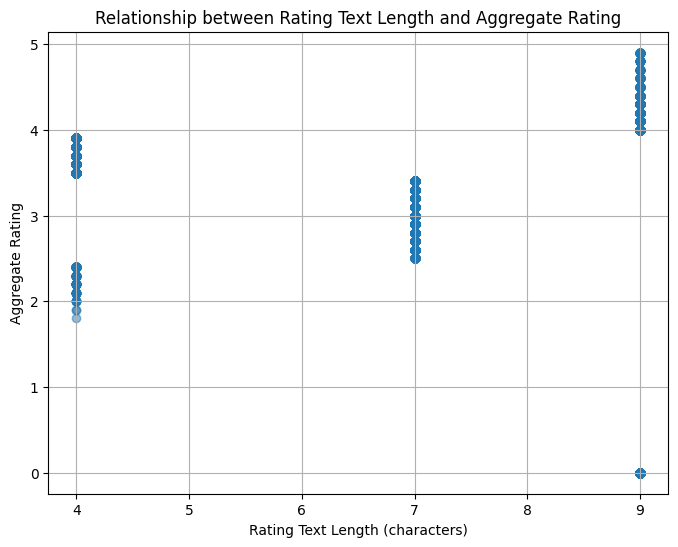

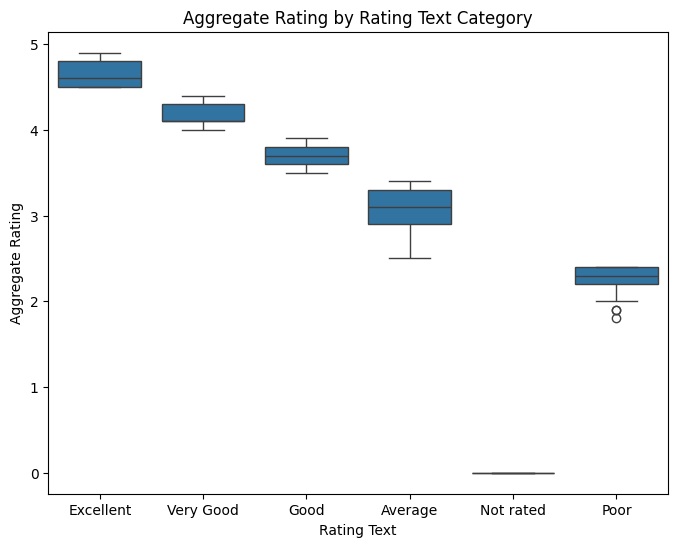

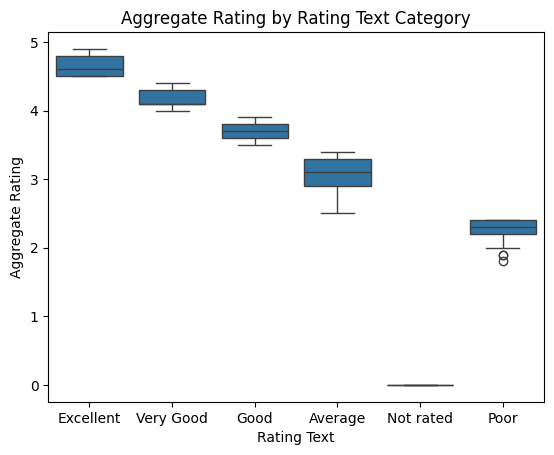

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
df = pd.read_csv('cleaned_dataset.csv')
 
 # Calculate length of Rating text
df['Rating Length'] = df['Rating text'].str.len()
 
 # Average length overall
avg_length = df['Rating Length'].mean()
print(f'Average length of Rating text: {avg_length:.2f} characters')
 
 # Average length per category
avg_length_per_cat = df.groupby('Rating text')['Rating Length'].mean().sort_values(ascending=False)
print('\nAverage length per Rating text category:')
print(avg_length_per_cat)
 
 # Correlation between length and Aggregate rating
corr = df[['Rating Length', 'Aggregate rating']].corr().iloc[0,1]
print(f'\nCorrelation between Rating Length and Aggregate Rating: {corr:.2f}')
 
 # Visualization: Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(df['Rating Length'], df['Aggregate rating'], alpha=0.5)
plt.title('Relationship between Rating Text Length and Aggregate Rating')
plt.xlabel('Rating Text Length (characters)')
plt.ylabel('Aggregate Rating')
plt.grid(True)
plt.show()

 # Box plot by category
plt.figure(figsize=(8,6))
sns.boxplot(x='Rating text', y='Aggregate rating', data=df)
plt.title('Aggregate Rating by Rating Text Category')
plt.xlabel('Rating Text')
plt.ylabel('Aggregate Rating')
plt.show()



sns.boxplot(x='Rating text', y='Aggregate rating', data=df)
plt.title('Aggregate Rating by Rating Text Category')
plt.xlabel('Rating Text')
plt.ylabel('Aggregate Rating')
plt.show()

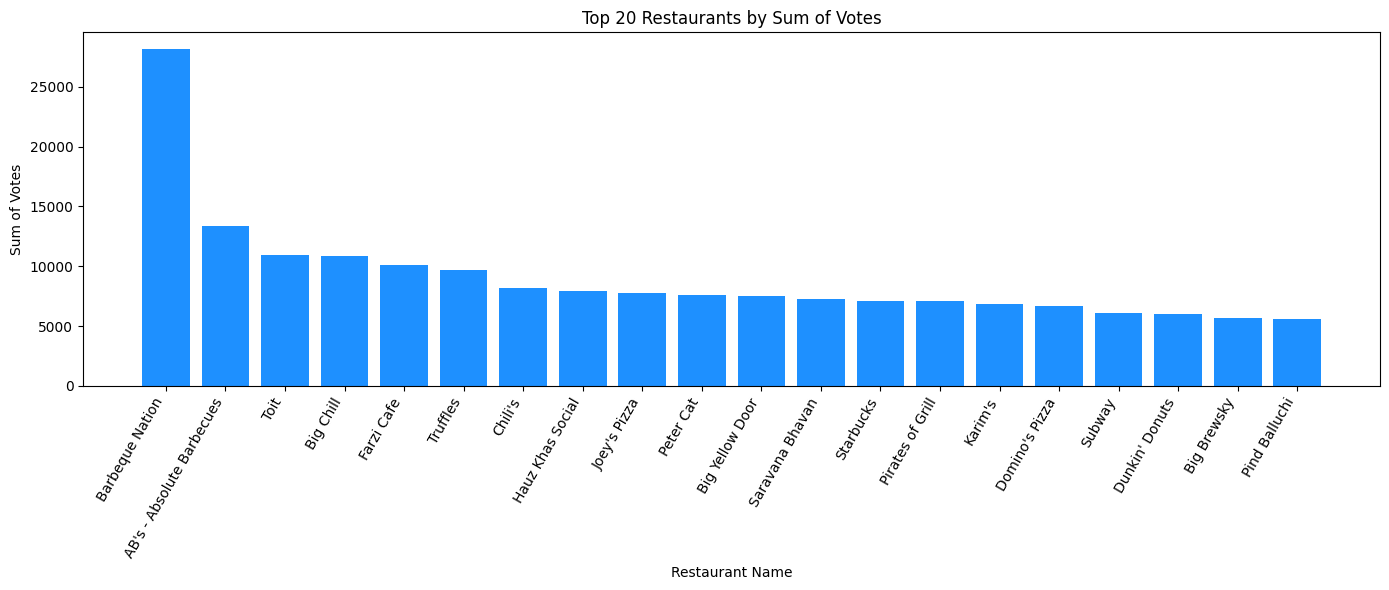

In [ ]:
grouped = df.groupby('Restaurant Name')['Votes'].sum().reset_index()
grouped_sorted = grouped.sort_values('Votes', ascending=False)

# Select top 20
top20 = grouped_sorted.head(20)

plt.figure(figsize=(14, 6))
plt.bar(top20['Restaurant Name'], top20['Votes'], color='dodgerblue')
plt.xlabel('Restaurant Name')
plt.ylabel('Sum of Votes')
plt.title('Top 20 Restaurants by Sum of Votes')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()


Top 10 Restaurants by Votes:
                 Restaurant Name  Votes  Aggregate rating
719                        Toit  10934               4.8
726                    Truffles   9667               4.7
3985           Hauz Khas Social   7931               4.3
2403                  Peter Cat   7574               4.3
730   AB's - Absolute Barbecues   6907               4.6
2405            Barbeque Nation   5966               4.9
734                 Big Brewsky   5705               4.5
2298  AB's - Absolute Barbecues   5434               4.9
727             The Black Pearl   5385               4.1
2402                      BarBQ   5288               4.2

Lowest 10 Restaurants by Votes:
         Restaurant Name  Votes  Aggregate rating
69     Cantinho da Gula      0               0.0
865       The Chaiwalas      0               0.0
870  Fusion Food Corner      0               0.0
871       Punjabi Rasoi      0               0.0
878       Baskin Robbin      0               0.0
891            

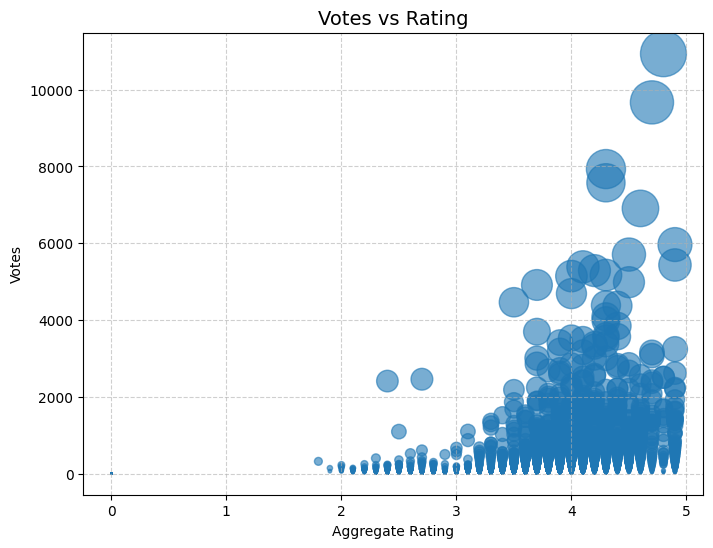

Correlation between Votes and Rating: 0.31


In [ ]:
# Top 10 and bottom 10 restaurants by votes
top_votes = df.nlargest(10, 'Votes')[['Restaurant Name', 'Votes', 'Aggregate rating']]
low_votes = df.nsmallest(10, 'Votes')[['Restaurant Name', 'Votes', 'Aggregate rating']]

print("Top 10 Restaurants by Votes:\n", top_votes)
print("\nLowest 10 Restaurants by Votes:\n", low_votes)

# --- Bubble Chart: Votes vs Rating ---
plt.figure(figsize=(8,6))
plt.scatter(df['Aggregate rating'], df['Votes'], s=df['Votes']*0.1, c='#1f77b4', alpha=0.6)
plt.title("Votes vs Rating", fontsize=14)
plt.xlabel("Aggregate Rating")
plt.ylabel("Votes")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# --- Correlation ---
corr = df[['Votes', 'Aggregate rating']].corr().iloc[0,1]
print(f"Correlation between Votes and Rating: {corr:.2f}")


   Price range  Online Delivery Available  Table Booking Available
0            1                   0.157954                 0.000225
1            2                   0.413106                 0.076775
2            3                   0.292527                 0.458363
3            4                   0.090444                 0.467577


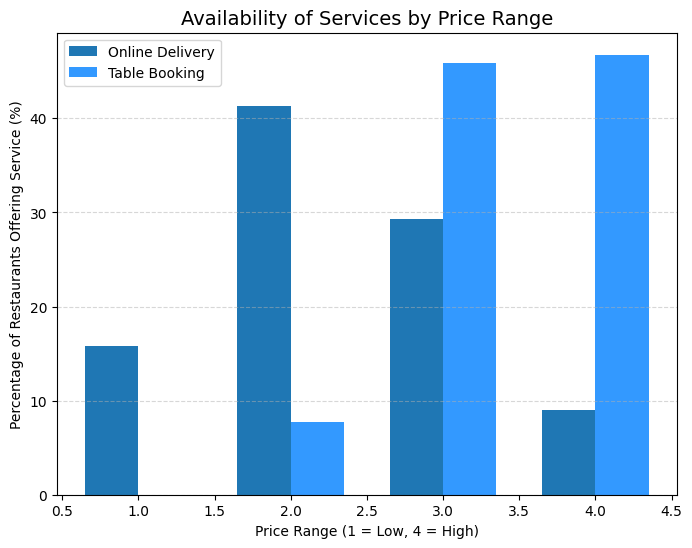

In [ ]:
# Clean up relevant columns
service_df = df[['Price range', 'Has Online delivery', 'Has Table booking']].dropna()

# Encode Yes/No as binary
service_df['Online Delivery Available'] = service_df['Has Online delivery'].apply(lambda x: 1 if str(x).lower() == 'yes' else 0)
service_df['Table Booking Available'] = service_df['Has Table booking'].apply(lambda x: 1 if str(x).lower() == 'yes' else 0)

# Group by Price Range
price_service = service_df.groupby('Price range')[['Online Delivery Available', 'Table Booking Available']].mean().reset_index()

print(price_service)

# --- Grouped Bar Chart ---
x = price_service['Price range']
width = 0.35

plt.figure(figsize=(8,6))
plt.bar(x - width/2, price_service['Online Delivery Available']*100, width, label='Online Delivery', color='#1f77b4')
plt.bar(x + width/2, price_service['Table Booking Available']*100, width, label='Table Booking', color='#3399ff')
plt.title("Availability of Services by Price Range", fontsize=14)
plt.xlabel("Price Range (1 = Low, 4 = High)")
plt.ylabel("Percentage of Restaurants Offering Service (%)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()
